In [8]:
from ViT import ViT
import torch

model =  ViT(
    embedding_size=768,
    patch_size=16,
    num_block=12,
    num_channels=3,
    classes=100,
    
)

In [9]:
model = model.to(device='cpu')

In [12]:
model

ViT(
  (patch_embedding): PatchEmbeddings(
    (patched_embeddings): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
    (flatten_embeddings): Flatten(start_dim=2, end_dim=3)
  )
  (positional_drop_out): Dropout(p=0.1, inplace=False)
  (encoder_block): Sequential(
    (0): encoder_block(
      (mha_layer): MultiHeadAttention(
        (layer_norm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (mha): MultiheadAttention(
          (out_proj): NonDynamicallyQuantizableLinear(in_features=768, out_features=768, bias=True)
        )
      )
      (ffn): FFN(
        (layer_norm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (ffn): Sequential(
          (0): Linear(in_features=768, out_features=3072, bias=False)
          (1): GELU(approximate='none')
          (2): Dropout(p=0, inplace=False)
          (3): Linear(in_features=3072, out_features=768, bias=False)
          (4): Dropout(p=0, inplace=False)
        )
      )
    )
    (1): encoder_block(
  

In [10]:
checkpoint_path = "/Users/777bhavyagoyal/Developer/IMPLEMENTING-RESEARCH-PAPERS/ViT/vit_epoch_9.pth"  

# Load the checkpoint with map_location set to 'cpu'
checkpoint = torch.load(checkpoint_path, map_location='cpu')

/var/folders/hp/y1d826dx5fb1405ppnjjm4700000gn/T/ipykernel_62307/1066085478.py:4: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(checkpoint_path, map_

In [13]:
from collections import OrderedDict

# Assuming 'checkpoint' is already loaded using torch.load(...)
new_state_dict = OrderedDict()
for k, v in checkpoint.items():
    name = k.replace("module.", "")  # remove 'module.' prefix
    new_state_dict[name] = v

# Now load the cleaned state_dict
model.load_state_dict(new_state_dict)


<All keys matched successfully>

In [16]:
import torch
import torch.nn as nn 
from torchvision import datasets,transforms
from torch.utils.data import DataLoader , random_split
BATCH_SIZE = 32
IMAGE_SIZE = 224

train_transforms = transforms.Compose(
    [
        transforms.Resize((IMAGE_SIZE,IMAGE_SIZE)),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.5]*3,std=[0.5]*3)
    ]
)
val_transforms = transforms.Compose(
    [
        transforms.Resize((IMAGE_SIZE,IMAGE_SIZE)),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.5]*3,std=[0.5]*3)
    ]
)

In [17]:
train_dataset = datasets.CIFAR100(root='data', train=True, download=True, transform=train_transforms)
val_dataset = datasets.CIFAR100(root='data', train=False, download=True, transform=val_transforms)

100%|██████████| 169M/169M [02:03<00:00, 1.37MB/s] 


Extracting data/cifar-100-python.tar.gz to data
Files already downloaded and verified


In [49]:
image, label = val_dataset[5540]
label

66

In [50]:
image_tensor = image.unsqueeze(0)  # Shape becomes [1, 3, H, W]

In [51]:
image_tensor = image_tensor.to('cpu')

In [52]:
model.eval()  

with torch.no_grad():
    output = model(image_tensor)
    predicted_class = torch.argmax(output, dim=1).item()
    


In [55]:
torch.argmax(output,dim=1).item()

66

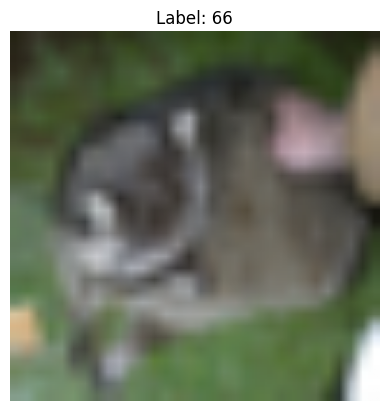

In [45]:
import matplotlib.pyplot as plt
import torchvision.transforms as transforms
import numpy as np

# Get one image from the dataset
image_tensor, label = val_dataset[5540]  

# Unnormalize: convert from [-1, 1] back to [0, 1]
unnormalize = transforms.Normalize(
    mean=[-1, -1, -1],
    std=[2, 2, 2]
)
image_tensor = unnormalize(image_tensor)

# Convert to NumPy for plotting
image_np = image_tensor.permute(1, 2, 0).numpy()  # [C, H, W] → [H, W, C]

# Plot
plt.imshow(image_np)
plt.title(f"Label: {label}")
plt.axis('off')
plt.show()
